In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties

In [2]:
X_svd = np.loadtxt('../dataset/X_svd.txt', delimiter=',')
X_svd_3 = np.loadtxt('../dataset/X_svd_3.txt', delimiter=',')

## Isolation Forests

In [3]:
X_train, X_test = train_test_split(X_svd_3,test_size=0.33, random_state=42)

In [4]:
for i in xrange(3):
    print X_train[i, 0], X_train[i, 1], X_train[i, 2]

-0.16585196278 0.0480424902946 -0.000188767666443
0.26129931165 0.00543058358795 0.00348270032276
31.5090564971 -0.131524140961 -0.0285728547619


In [5]:
for i in xrange(3):
    print X_test[i, 0], X_test[i, 1], X_test[i, 2]

-0.220898530482 3.00149478328 -0.302043905574
0.536583810004 2.63746911967 0.373900810426
33.8020228141 -0.994195492689 0.167978851445


In [6]:
# fit the model
clf = IsolationForest(max_samples='auto', random_state=42, contamination=0.02)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [7]:
X_outliers = np.array(np.zeros(shape=(len(X_test),3)))
anomalyIndex = []
for i in xrange(len(y_pred_test)):
    if y_pred_test[i] == -1:
        anomalyIndex.append(i)        
        temp = []
        for j in xrange(3):
            temp.append(X_test[i, j])
        X_outliers[i] = temp

In [8]:
with open('../anomalies/isolationForest.txt', 'w') as f:
    temp = []
    for line in anomalyIndex:
        temp = str(line) + "\n"
        f.write(temp)

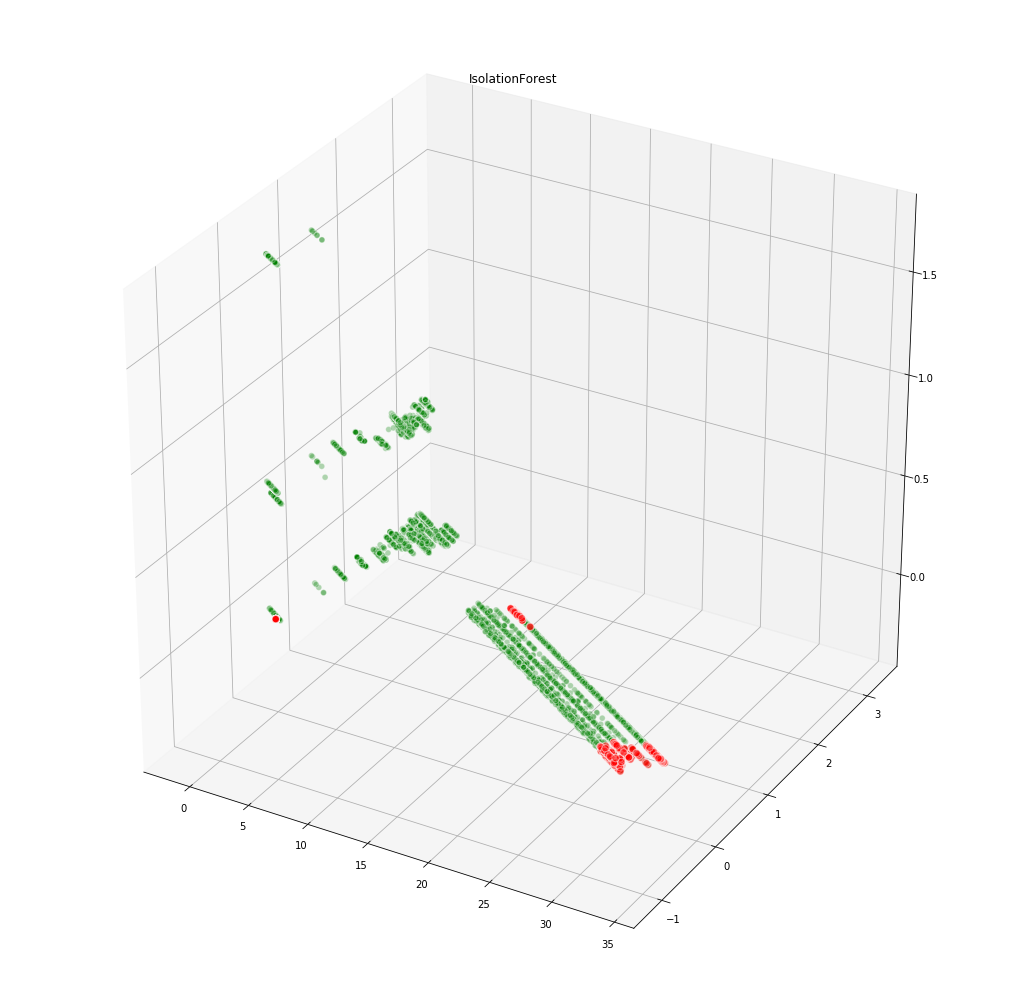

In [9]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

# plot the line, the samples, and the nearest vectors to the plane
#xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

#b1 = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], alpha=0.1, c='blue', edgecolor='w', s=15)
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], alpha=0.3, c='green', edgecolor='w', s=35)
c = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], X_outliers[:, 2], alpha=0.5, c='red', edgecolor='w', s=55)
plt.axis('tight')
#plt.legend([b1, b2, c],["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.show()